# Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare/collect data

In [2]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1} # for the two foler respectively


In [3]:
import cv2
X = []  # we will append all images here
Y = []  # 0(no tumour) for first iteration and 1(tumour) for second iteration
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0) # 0 is for reading images in 2-dimension
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
np.shape(X)

(1222, 200, 200)

In [5]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1) # because sklean works only for 2 dimension data  and its 3d , so we are making it 2d

In [6]:

print(np.unique(Y))

[0 1]


In [7]:
pd.Series(Y).value_counts()
# (we have 950 images for training and 250 images for testing our model )

1    827
0    395
dtype: int64

In [8]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

# Visualize data

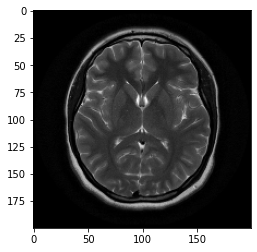

In [9]:
plt.imshow(X[12], cmap='gray')  
# The imshow() function in pyplot module of matplotlib library is used to display data as an image;
# i.e. on a 2D regular raster

# Split Data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

# Feature Scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Train Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# to create a linear SVM model in scikit-learn, there are two
# functions from the same module svm : SVC and LinearSVC .

# Logistic Regression

In [14]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression()
lg.fit(xtrain, ytrain)


LogisticRegression()

# Support Vector Machine ( SVM )

In [15]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

# K Nearest Neighbours ( KNN )

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

# Evaluation

In [18]:
# Testing Score of Logistic Regression

In [19]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.963265306122449


In [20]:
# Testing Score of SVM

In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9928352098259979
Testing Score: 0.9591836734693877


In [34]:
# Testing Score of KNN

In [35]:
print("Training Score:", knn.score(xtrain, ytrain))
print("Testing Score:", knn.score(xtest, ytest))

Training Score: 0.9477993858751279
Testing Score: 0.9551020408163265


# Prediction

In [36]:
pred = lg.predict(xtest)


In [37]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 12,  29,  32,  36,  58, 138, 169, 225, 235], dtype=int64),)

In [38]:
print("Total Misclassified Samples: ",len(misclassified[0]))  # 0 represents 1 dimension


Total Misclassified Samples:  9


# TEST MODEL

In [39]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

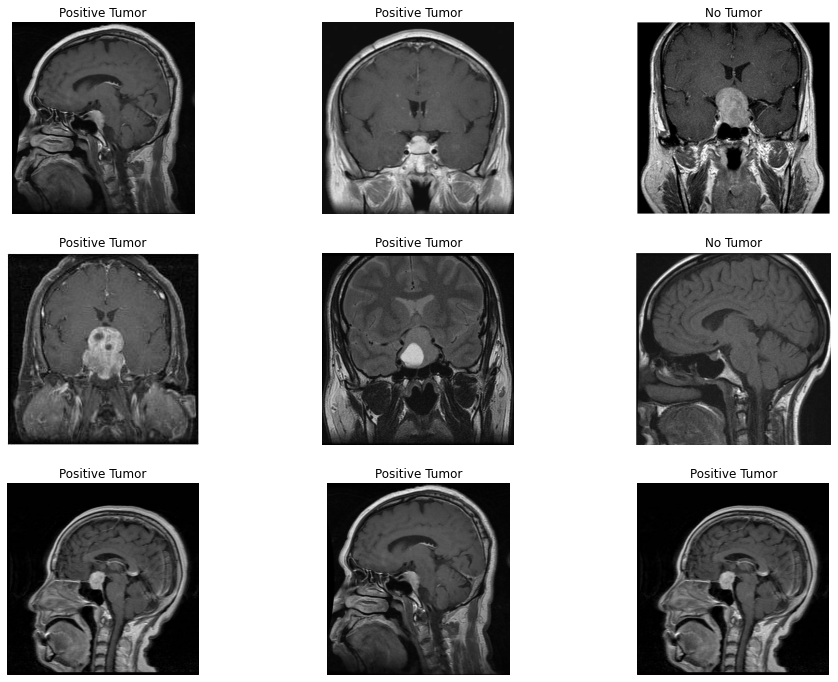

In [40]:
plt.figure(figsize=(16,12))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

# Using Pickle Module to Export Model

In [41]:
import pickle

In [42]:
with open('model_pickle','wb') as f:  #'wb' means 'write binary'
    pickle.dump(lg,f)

In [43]:
with open('model_pickle','rb') as f: 
    mp = pickle.load(f)

# Making prediction using Pickle Object

In [44]:
img2 = cv2.imread('brain_tumor/Testing/pituitary_tumor/image(36).jpg',0)
img3 = cv2.resize(img2, (200,200))
img3 = img3.reshape(1,-1)/255
z= mp.predict(img3)
z   

array([1])

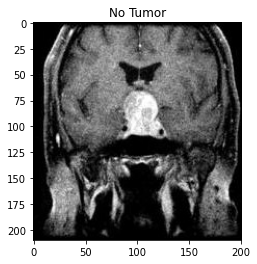

In [45]:
dec = {0:'No Tumor', 1:'Positive Tumor'}
img = cv2.imread('brain_tumor/Testing/pituitary_tumor/image(36).jpg',0)
img1 = cv2.resize(img, (200,200))
img1 = img1.reshape(1,-1)/255
p = sv.predict(img1)
plt.title(dec[p[0]])
plt.imshow(img, cmap='gray')
# plt.axis('off')